# Exploration et caractérisation de pourriels avec <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a>

DUONG - THIAM,
INSA Toulouse,
2017 - 2018

**Introduction**
Tout service de messagerie électronique permet de rediriger automatiquement les spams (pourriels) dans un dossier distinct de la boîte de reception. C'est-à-dire que sans aucune intervention particulière de l'utilisateur, le système est capable de detecter des messages potentiellement indésirables.

Pour ce faire, il est nécessaire de définir des attributs pouvant caractériser un spam. Ainsi,  pour un message donné, sur la base d'analyse de ces caractéristiques, nous serons en mesure de nous prononcer sur la question:  *Spam ou Pas spam*. On parle alors de prédiction. Toute tentative de prédiction suppose une analyse préable des données anciennes, c'est l'objectif de ce projet.

Dans cette optique, nous allons mettre en oeuvre quelques méthodes de statistique multidimensionnelle telles que l'ACP, AFC, MDS et la classification non supervisée. Notre analyse s'appuie sur un corpus de courriels déjà élaboré par *George, ingénieur chez HP dans le département*. Pour chaque courriel (entrée statistique), le nombre d'occurrences d'une sélection de mots et caractères a été évalué. Nous disposons au début de cette étude, un fichier *spam.dat* contenant ces informations.

Pour comparer les différentes approches, nous avons à notre disposition une variable supplémentaire *spam* indiquant si le message est un pourriel ou non.

**Préliminaires**

Les variables d'études sont rassemblées dans deux tableaux (selon leur nature).

*Tableau 1: Representent des rapports/  Les colonnes contiennent successivement le libellé de la variable, le mot ou ensemble de caractères concernés, le libellé des modalités Présence / Absence utilisées après recodage.*

Variable   | Mot ou Carac |    Modalités P/A   | Variable   | Mot ou Carac. |   Modalités  
  --|-- --|-- --|-- --|-- --|--               
make |    make |   make / Nmk|    X650 |   650 |   650 / N65 
address |   address |   addr / Nad |   lab |   lab |   lab / Nlb
all |   all |   all / Nal |   labs |   labs |   labs / Nls 
X3d |   3d |   3d / N3d |   telnet |   telnet |   teln / Ntl 
our |   our |   our / Nou |   X857 |   857 |   857 / N87 
over |   over |   over / Nov |   data |   data |   data / Nda  
remove |   remove |   remo / Nrm |   X415 |   415   | 415 / N41 
internet |   internet |   inte / Nin |   X85 |   85 |   85 / N85 
order |   order |   orde / Nor |   technology |   technology |   tech / Ntc 
mail |   mail |   mail / Nma |   X1999 |   1999 |   1999/ N19 
receive |   receive |   rece / Nrc |   parts |   parts |   part / Npr 
will |   will |   will / Nwi |   pm |   pm |   pm / Npm 
people |   people |   peop / Npp |   direct |   direct |   dire / Ndr 
report |   report |   repo / Nrp |   cs |   cs |   cs / Ncs 
addresses |   addresses   | adds / Nas |   meeting |   meeting |   meet/Nmt 
free |   free |   free / Nfr |   original |   original |   orig / or 
business |   business |   busi / Nbs |   project |   project |   proj / Npj 
email |   email |   emai / Nem |   re |   re |   re / Nre 
you |   you |   you / Nyo |   edu |   edu |   edu / Ned 
credit |   credit |   cred / Ncr |   table    | table |   tabl / Ntb 
your |   your |   your / Nyr |   conference |   conferenc |e   conf / Ncf 
font |   order |   font / Nft |   CsemiCol |   ; |   Cscl / NCs 
X000 |   000 |   000 / N00 |   Cpar |   (    | Cpar / NCp 
money |   money |   mone/ Nmn |   Ccroch |   [    | Ccro / NCc 
hp |   hp |   hp / Nhp |   Cexclam |    ! |   Cexc / NCe 
hpl |   hpl |   hpl / Nhl |   Cdollar |   \$ |   Cdol / NCd  
george |   george |   geor / Nge |   Cdiese | # |   Cdie / NCi  


*Tableau 2: Denombrant les lettres majuscules/ Liste de 4 variables, de leur libellé et des modalités après recodage.*

Code variable | Libellé | Modalités
--|-- --|--
Spam | Type de message pourriel ou non |  Spam / Nsp
CapLM |	Nombre moyen de capitales par mot |  Mm1 / Mm2 / Mm3
CapLsup	| Nombre max de capitales par mot | Ms1 / Ms2 / Ms3 
CapLtot	| Nombre totale de lettres capitales |	Mt1 / Mt2 / Mt3 

**Lecture des données**

In [454]:
#importation des libraires utiles
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.mode.chained_assignment = None  # default='warn'

In [455]:
#Lecture
path=""; spam = pd.read_csv(path+'spam.dat', sep=" ",header= 0,index_col=False)

In [456]:
#Visualisation
#spam

In [457]:
#Nombre d'entrées, nombre de variables
n, p = np.shape(spam)
print(n,p)

4601 58


## I. Analyse descriptive élémentaire

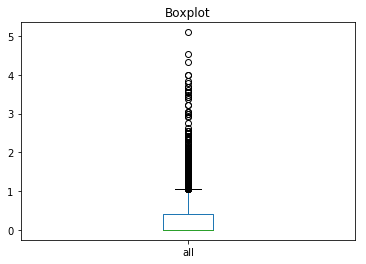

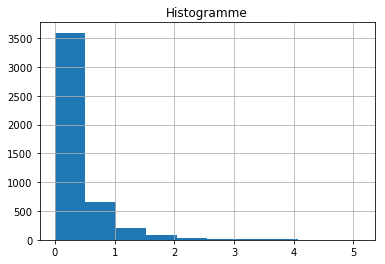

In [458]:
#Boxplot
spam["all"].plot(kind = "box")
plt.title('Boxplot')
plt.show()

#Histogramme
spam["all"].hist()
plt.title('Histogramme')
plt.show()

> Observations: asymétrie, beaucoup de zeros (matrice creuse)

Dans cette étude, on distingue deux types de variables, celles qui representent des rapports (*tableau 1*), et celles qui expriment un nombre d'occurences (*tableau 2*).

**Les rapports**

In [459]:
liste_rapport = ["make", "address", "all",
        "X3d", "our", "over", "remove", "internet", "order", "mail", "receive",
        "will", "people", "report", "addresses", "free", "business", "email", "you", "credit",
        "your", "font", "X000", "money", "hp", "hpl", "george", "X650", "lab", "labs",
        "telnet", "X857", "data", "X415", "X85", "technology", "X1999", "parts", "pm",
        "direct", "cs", "meeting", "original", "project", "re", "edu", "table", "conference",
        "CsemiCol", "Cpar", "Ccroch", "Cexclam", "Cdollar", "Cdiese"];
spam_vr = spam[liste_rapport]
#spam_vr

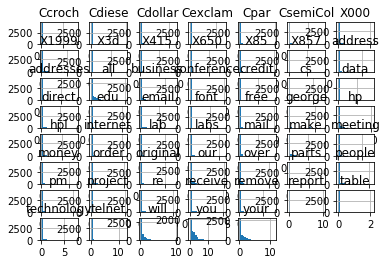

In [460]:
#Histogramme
spam_vr.hist(bins=20)
plt.title('Histogramme - rapports')
plt.show()

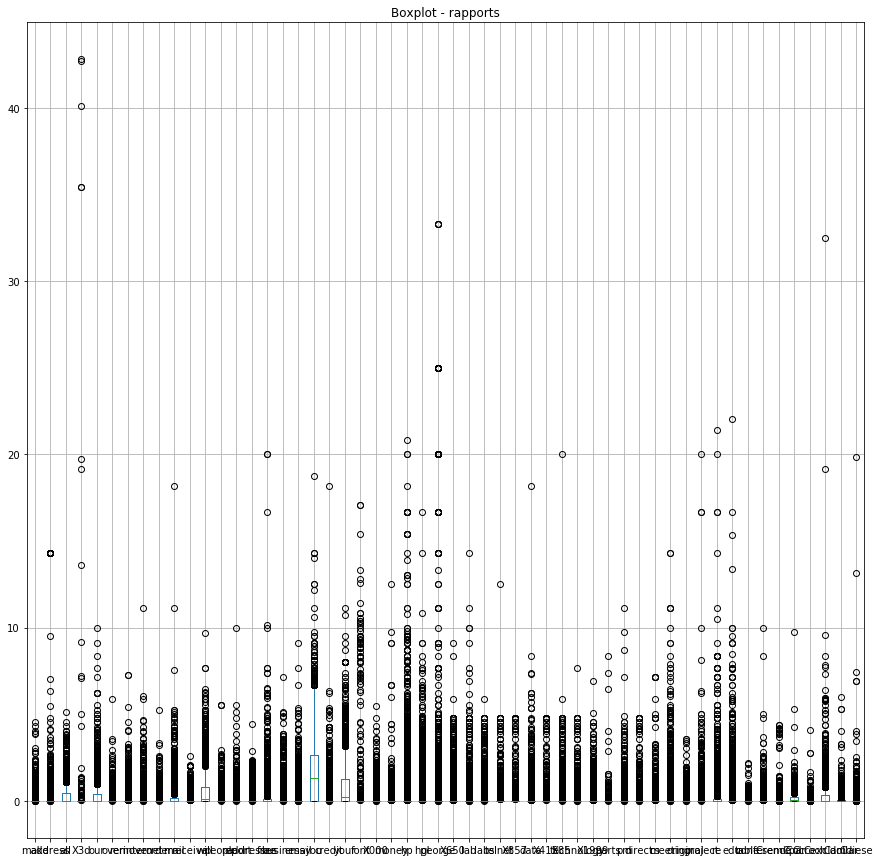

In [461]:
#Boxplot
fig = plt.figure(figsize=(15,15))
spam_vr.boxplot()
plt.title('Boxplot - rapports')
plt.show()

**Présence de lettres capitales**

In [462]:
#Nombre d'occurences
liste_nb_occurrence = ["CapLM", "CapLsup", "CapLtot"];
spam_vn = spam[liste_nb_occurrence]
#spam_vn

In [463]:
print("Mean")
spam_vn.mean()

Mean


CapLM        5.191515
CapLsup     52.172789
CapLtot    283.289285
dtype: float64

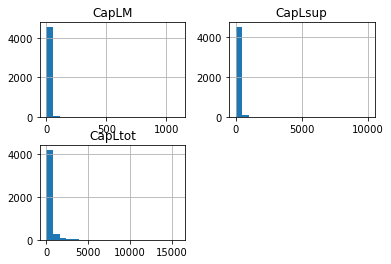

In [464]:
#Histogramme
spam_vn.hist(bins=20)
plt.title('Histogramme - lettres capitales')
plt.show()

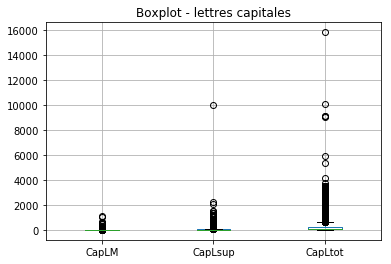

In [465]:
#Boxplot
spam_vn.boxplot()
plt.title('Boxplot - lettres capitales')
plt.show()

> Observations: Asymétrie à gauche, beaucoup d'outliers, log-normalité.

**Transformation des données**

On effectue une transformation *log-normale* afin se ramener à des données suivant une tendance normale.

In [466]:
Lspam_vr = np.log(1+spam_vr)
Lspam_vn = np.log(1+spam_vn)

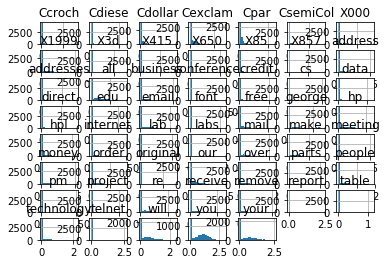

In [467]:
#Histogrammes après transformation
Lspam_vr.hist(bins=20)
plt.title('Hist. apres. transf. - rapports')
plt.show()

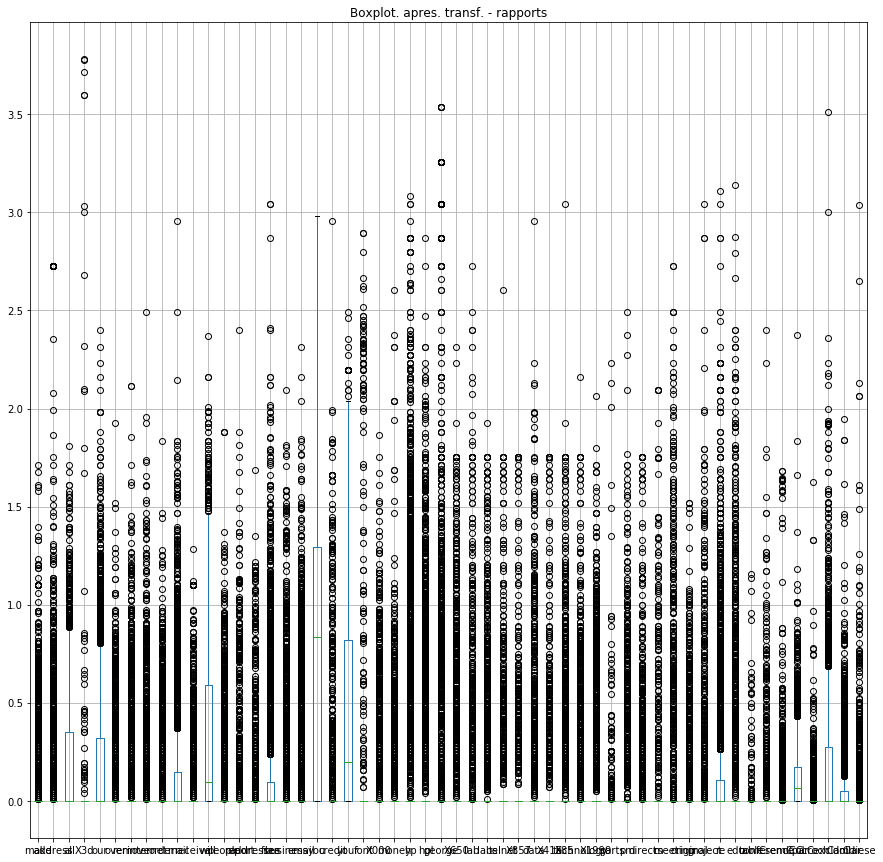

In [468]:
#Boxplots après transformation
fig = plt.figure(figsize=(15,15))
Lspam_vr.boxplot()
plt.title('Boxplot. apres. transf. - rapports')
plt.show()

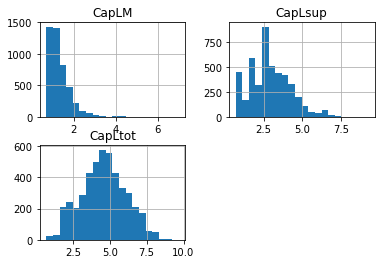

In [469]:
#Histogrammes après transformation
Lspam_vn.hist(bins=20)
plt.title('Hist. apres. transf. - lettres capitales')
plt.show()

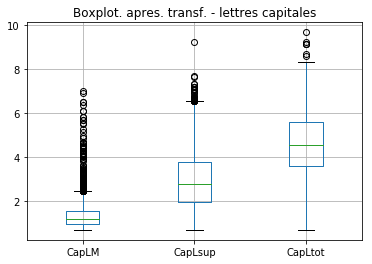

In [470]:
#Boxplots après transformation
Lspam_vn.boxplot()
plt.title('Boxplot. apres. transf. - lettres capitales')
plt.show()

> Observations: Symétrie, beaucoup d'outliers, tendance normale.

Après cette brève description élementaire, nous allons mettre en oeuvre quelques approches quantitatives.

## II. Analyse par composantes principales - ACP

In [471]:
#Importation des librairies utiles
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [472]:
# définition de la commande
pca = PCA()

In [473]:
# Données
Lspam = spam[["spam"] + liste_rapport + liste_nb_occurrence]
#log-normalisation
Lspam[liste_rapport + liste_nb_occurrence] = np.log(1 + Lspam[liste_rapport + liste_nb_occurrence])

### ACP centrée non réduite

In [474]:
#transformation en une dataframe
data_non_reduit = pd.DataFrame(Lspam)

In [475]:
#Composantes principales
Comp_non_reduit  = pca.fit(data_non_reduit).transform(data_non_reduit)

**Variance expliquée par les vecteurs propres**

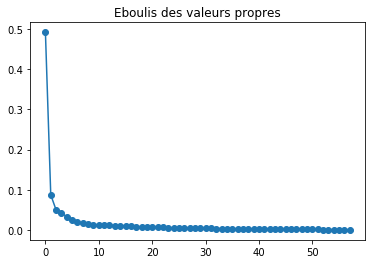

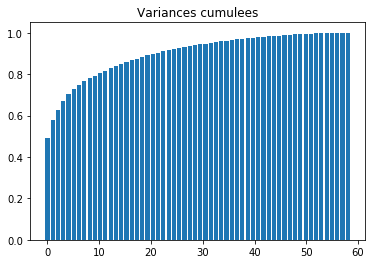

In [476]:
plt.figure()
plt.plot(pca.explained_variance_ratio_,marker='o')
plt.title('Eboulis des valeurs propres')
plt.show()

plt.figure()
plt.bar(np.linspace(0,len(pca.explained_variance_ratio_),len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.title('Variances cumulees')
plt.show()

> Observations: Variance expliquée en grande partie par les trois premiers vecteurs propres (environ 2/3).

**Composantes principales**

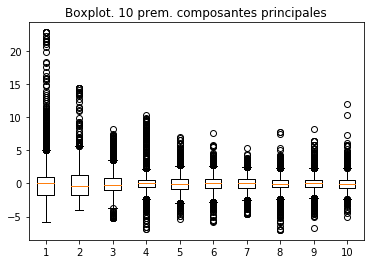

In [477]:
plt.figure()
plt.boxplot(Comp[:,0:10])
plt.title('Boxplot. 10 prem. composantes principales')
plt.show()

> Observations: même distribution, beaucoup d'ouliers.

**Coordonnées des variables dans le premier plan**

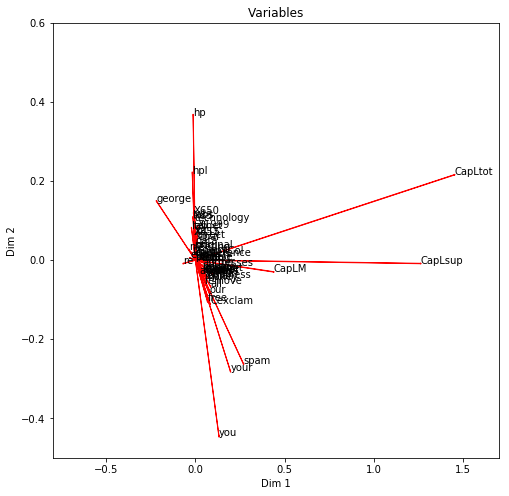

In [478]:
#Calcul des coordonnées
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])

#Affichage
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_non_reduit.columns):
    plt.text(i, j, nom) 
    plt.arrow(0,0,i,j,color='r')
plt.axis((-0.8,1.7,-0.5,0.6))

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('Variables')
plt.show()

> Observations: Composante 1 portée principalement par les variables CapLtot et CapLsup qui présentent de grandes valeurs: ne permet pas une interprétation correcte.

Nous avons effectué une ACP centrée non reduite -*en diagonalisant la matrice de variance-covariance*-, il plutôt préferable d'effectuer une ACP centrée et réduite -*réduction des données, même echelle pour toutes les variables*-.

### ACP centrée réduite

In [479]:
#scale: pour la réduction
data = pd.DataFrame(scale(Lspam),columns = Lspam.columns)

In [480]:
#Composantes principales
Comp = pca.fit(data).transform(data)

**Variance expliquée par les vecteurs propres**

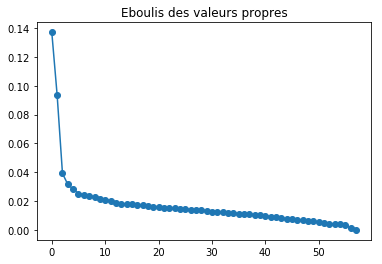

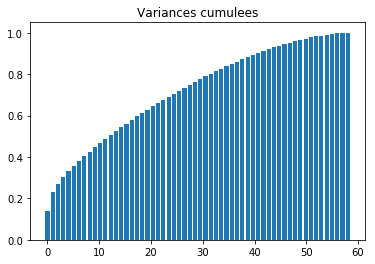

In [481]:
plt.figure()
plt.plot(pca.explained_variance_ratio_,marker='o')
plt.title('Eboulis des valeurs propres')
plt.show()

plt.figure()
plt.bar(np.linspace(0,len(pca.explained_variance_ratio_),len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.title('Variances cumulees')
plt.show()

> Observations: L'inertie distribuée sur plusieurs axes: difficile d'écrire une partie raisonnable des données par seulement deux axes principaux. Description de 80% de l'information nécéssite au moins une trentaine de variables. Variables d'études moins correlées.

Nous voyons ici une limite de l'ACP. Elle est seulement pratique lorsque la grande partie de l'information est concentrée sur deux ou trois composantes, au-délà les interprétations deviennent fastidieuses.

**Composantes principales**

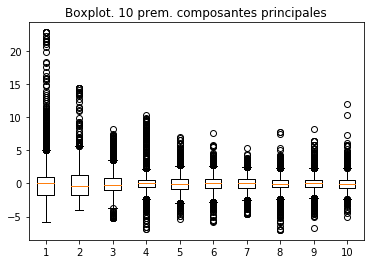

In [482]:
plt.figure()
plt.boxplot(Comp[:,0:10])
plt.title('Boxplot. 10 prem. composantes principales')
plt.show()

> Observations: Beaucoup d'outliers, mêmes caractéristiques.

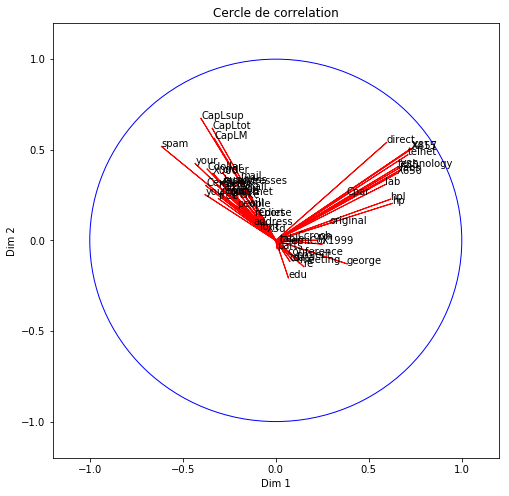

In [483]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])

#Affichage
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))

#Cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)

plt.title('Cercle de correlation')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

> Observations: Première composante portée principalement par les variables *direct, technology, X857, X650 ...*: le nombre d'occurence de certains mots et caractères.
La seconde est menée par *CapLsup, CapLfot* et *CapLM*: le nombre de lettres capitales.

**Les courriels**

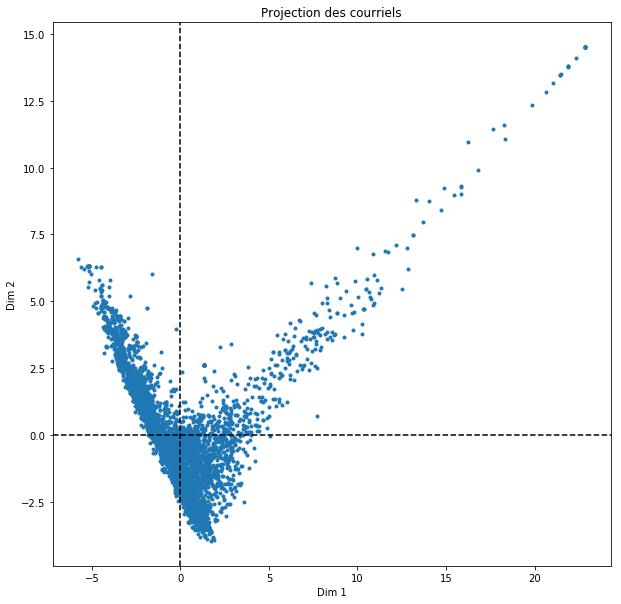

In [484]:
#Coordonnées des individus
plt.figure(figsize=(10,10))
plt.plot(Comp[:,0], Comp[:,1], '.')
plt.axhline(y=0,ls = '--', color='black')
plt.axvline(x=0,ls='--', color='black')

plt.title('Projection des courriels')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

> Observations: Données alignées *globalement* autour de deux droites. Aucune caractérisation évidente des pouriels à ce stade (seulement 27% de l'information représentée par les deux premiers axes principaux).

Nous utilisons la variable *spam* pour tenter explication à l'aide de l'ACP réalisée.

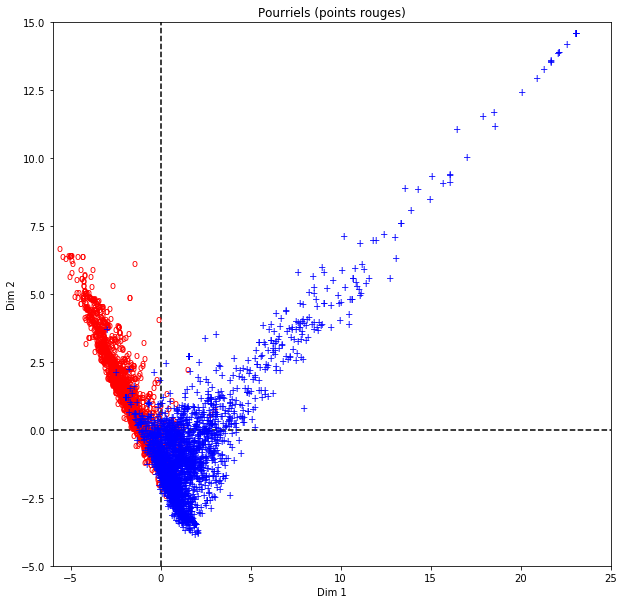

In [485]:
#Affichage
plt.figure(figsize=(10,10))
for i, j, nom in zip(Comp[:,0], Comp[:,1], Lspam["spam"]):
    if nom == 1:
        color = "red"
        m = 'o'
    else:
        color = "blue"
        m = '+'
    plt.text(i, j, m, color=color)
plt.axis((-6,25,-5,15))
#les axes
plt.axhline(y=0,ls = '--', color='black')
plt.axvline(x=0,ls='--', color='black')

plt.title('Pourriels (points rouges)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show() 

>Observations: Pourriels caracterisés par une forte présence des lettres majuscules. Certains courriels *propres* présentent cette même caractéristique: discrimination linéaire difficile.

**Conclusion - ACP**: L'analyse en composantes principales ne permet pas une segmentation intéressante des courriels -nombre important de variables-. Nous nous tournons alors vers d'autres méthodes plus sophistiquées.

## III. Classification ascendante hiérarchique - CAH

Le point important dans cette approche réside dans le choix de la distance de similarités.

In [486]:
#Librairies
from scipy.cluster.hierarchy import *

### Distance définie par les coefficients de corrélation

Deux variables fortement correlées se veront attribuées une distance petite (proche de 0). Inversement, une grande distance indique l'abscence de corrélation entre les variables considérées.

In [487]:
dist= 1 - data[liste_rapport + liste_nb_occurrence].corr()**2

In [488]:
#Critères d'agglomération
Z1 = linkage(dist, 'ward')

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel/__main__.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app


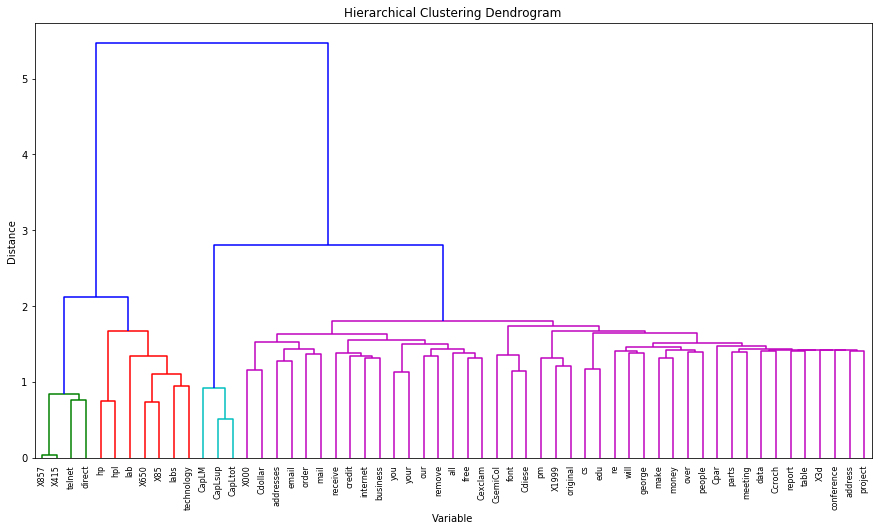

In [489]:
#Affichage
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variable')
plt.ylabel('Distance')

#Dendogram
clas = dendrogram(Z1,distance_sort =False,leaf_font_size=8.,color_threshold = 2.,labels=data[liste_rapport + liste_nb_occurrence].columns)
plt.show()

**Noeuds et inertie**

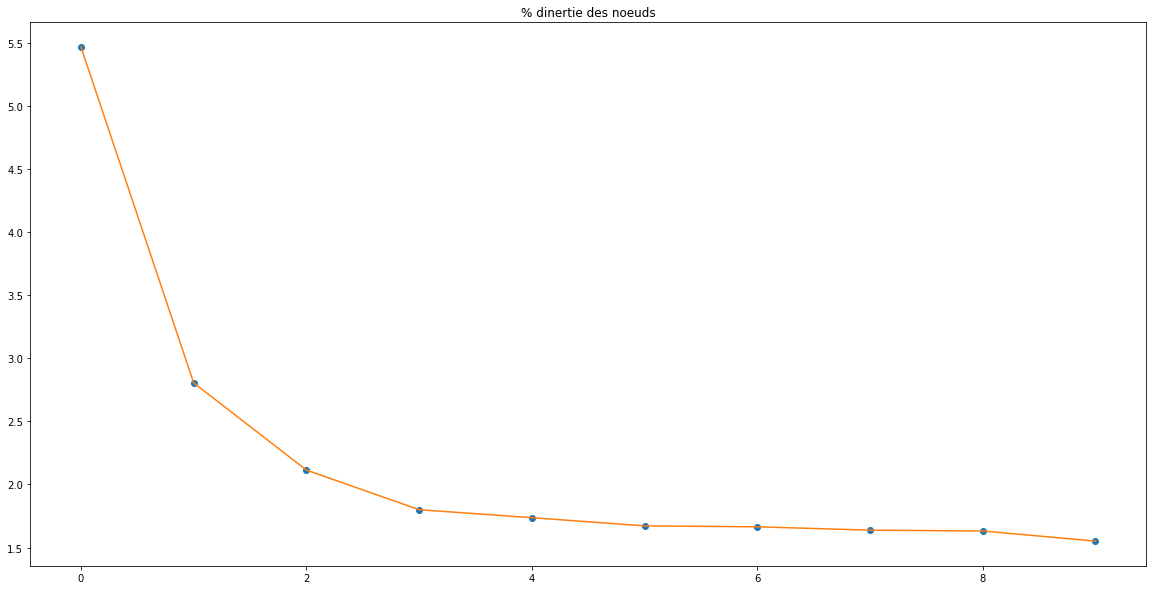

In [490]:
plt.figure(figsize=(20, 10))
plt.plot(maxdists(Z1)[::-1][0:10], 'o')
plt.plot(maxdists(Z1)[::-1][0:10])
plt.title('% d''inertie des noeuds')
plt.show()

>Observations: Saut d'inertie inter-classe entre les passage de 5 à 4 classes et de 4 à 3 classes. Pouvons alors retenir 4 classes.

### Distance euclidienne

Exprime la proximité euclienne: deux variables ayant des valeurs proches auront une faible distance.

In [491]:
#Critères d'agglomération: ward, distance euclidienne
Z2 = linkage(data[liste_rapport + liste_nb_occurrence].T,'ward' ,metric = 'euclidean')

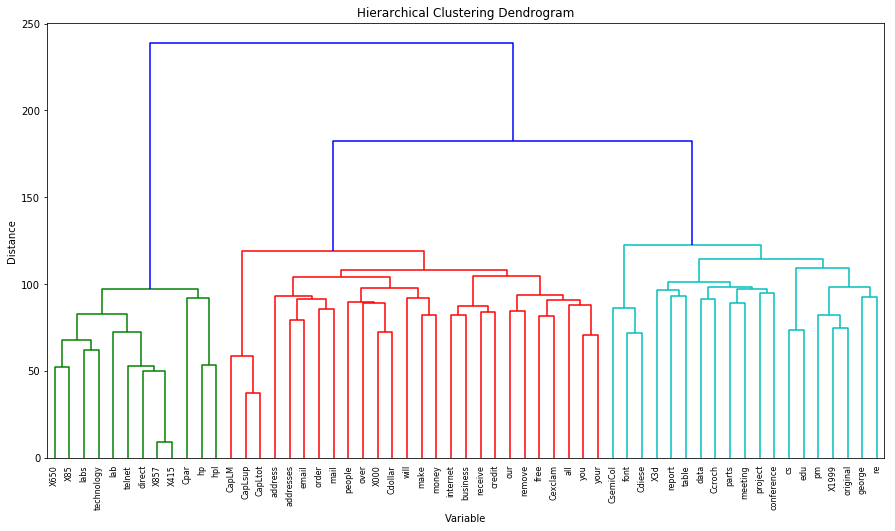

In [492]:
#Affichage
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variable')
plt.ylabel('Distance')

#Dendogram
clas = dendrogram(Z2,distance_sort =False,leaf_font_size=8.,labels=data[liste_rapport + liste_nb_occurrence].columns)
plt.show()

**Noeuds**

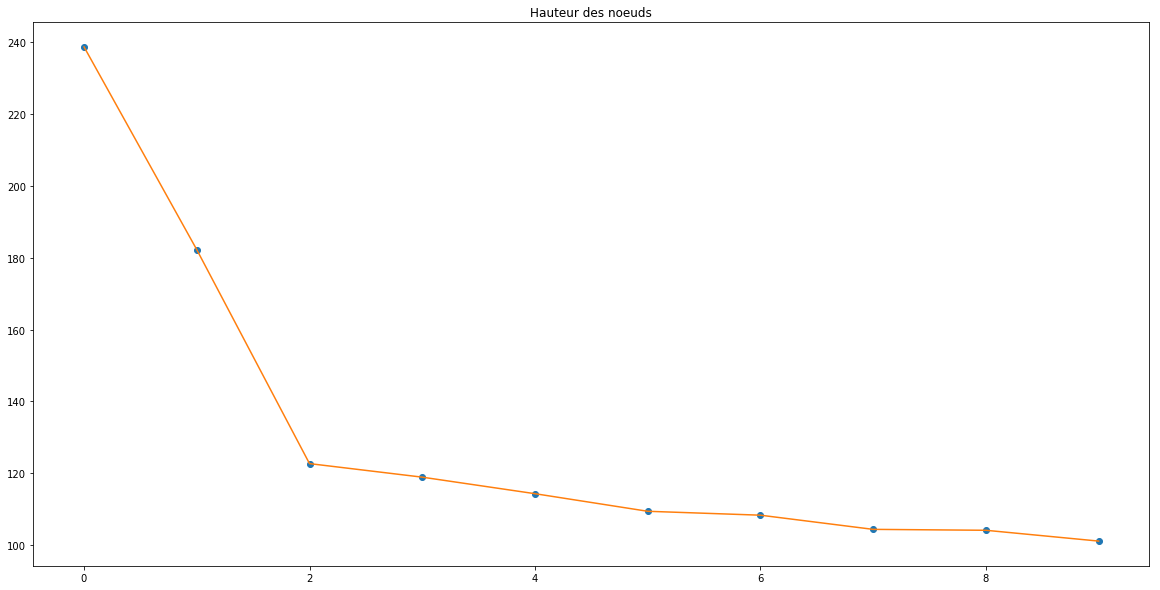

In [493]:
plt.figure(figsize=(20, 10))
plt.plot(maxdists(Z2)[::-1][0:10], 'o')
plt.plot(maxdists(Z2)[::-1][0:10])
plt.title('Hauteur des noeuds')
plt.show()

>Observations: Saut d'inertie inter-classe entre le passage des noeuds 3 à 2. Pouvons alors retenir 3 classes.

## IV. Positionnement multidimensionnel - MDS

**Distances (euclidiennes) entre variables**

In [494]:
from sklearn.metrics import euclidean_distances

**Positions des variables à partir de la matrice de distance D**

In [495]:
from __future__ import division
def cmdscale(D):
    #Nombre de points                                                                       
    n = np.shape(D)[0]
 
    #Etape 1
    A = -0.5 * D**2
    
    #Etape 2: Centrage de la matrice                                                                       
    H = np.eye(n) - np.ones((n, n)).dot(D)/n
 
    #Etape 3
    B = H.dot(A).dot(H.T)
 
    # Diagonalisation                             oix d’une méthode                                               
    evals, evecs = np.linalg.eigh(B)
 
    # Tri par ordre décroissant des valeurs propres                                                 
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Calcul des coordonnées de variables                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w])) #racine de delta
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

In [496]:
#dist: distance issue des coefficients de corrélation
Y, evals = cmdscale(dist)

**Classification dans le premier plan du MDS**

In [497]:
#liste des variables
liste = liste_rapport + liste_nb_occurrence

In [498]:
#Récuperation des couleurs
couleur = clas["color_list"]
couleur = ['g']+couleur #element manquant ??
couleur[p-2] = 'c'; couleur[p-3] = 'c'
nom_var = clas["ivl"]

In [499]:
#Tri des couleurs dans le bon ordre
clas_color = []
i = 0
while i < len(nom_var):
    indice = nom_var.index(liste[i]) # indice de liste[i] dans nom_var
    clas_color.append(couleur[indice])
    i = i+1

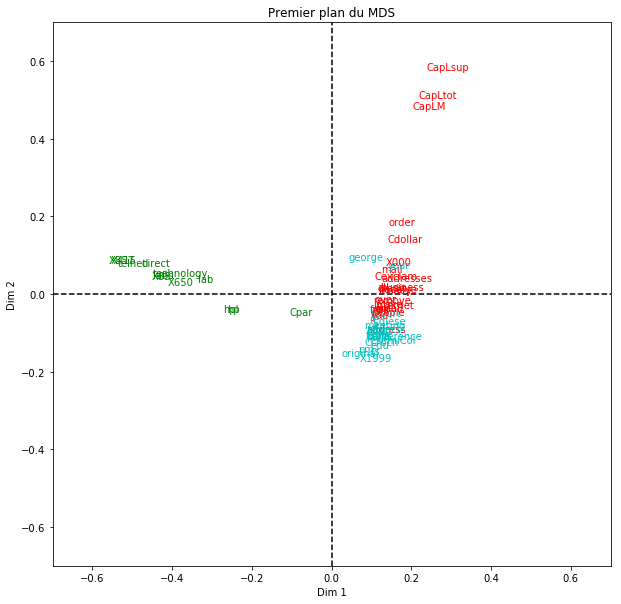

In [500]:
#Affichage
plt.figure(figsize=(10.,10.))
for i, j, nom, color in zip(Y[:,0], -Y[:,1], liste, clas_color):
    plt.text(i, j, nom, color=color)

plt.axis((-0.7,0.7,-0.7,0.7))
plt.axhline(y=0,ls='--', color='black')
plt.axvline(x=0,ls='--', color='black')

plt.title('Premier plan du MDS')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

> Observations: Résultats similaires à ceux obtenus avec l'ACP précédemment. En effet, distance utilisée issue de la matrice des corrélations -aussi utilisée dans le cas d'une ACP centrée réduite.

## V. Analyse factorielle des correspondances multiples - AFCM

In [501]:
import mca

In [502]:
#Lecture
path=""; spamq = pd.read_csv(path+'spamq.dat', sep=" ",header='infer', index_col=0)

In [503]:
#Visualisation
#spamq

In [504]:
#Préparation
X = spamq.drop(['spamf', 'X857','X415'],axis=1); 

In [505]:
# Tableau disjonctif complet
D=pd.DataFrame(pd.get_dummies(X))

In [506]:
#Modalités
np.sum(D)

make_Nmk           3548
make_make          1053
address_Nad        3703
address_addr        898
all_Nal            2713
all_all            1888
X3d_3d               47
X3d_N3d            4554
our_Nou            2853
our_our            1748
over_Nov           3602
over_over           999
remove_Nrm         3794
remove_remo         807
internet_Nin       3777
internet_inte       824
order_Nor          3828
order_orde          773
mail_Nma           3299
mail_mail          1302
receive_Nrc        3892
receive_rece        709
will_Nwi           2276
will_will          2325
people_Npp         3749
people_peop         852
report_Nrp         4244
report_repo         357
addresses_Nas      4265
addresses_adds      336
                   ... 
project_proj        327
re_Nre             3290
re_re              1311
edu_Ned            4084
edu_edu             517
table_Ntb          4538
table_tabl           63
conference_Ncf     4398
conference_conf     203
CsemiCol_Cscl       790
CsemiCol_NCs    

In [507]:
#Modalités
#np.sum(D)

In [508]:
# AFCM sur D
mca_comp=mca.MCA(D,benzecri=False)

**Variance expliquée**

In [509]:
print('Inertie')
print(mca_comp.inertia)

Inertie
1.05454545455


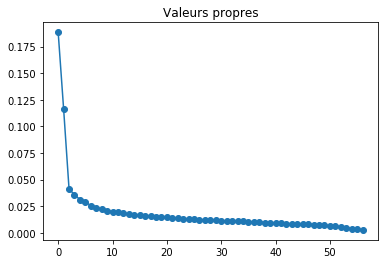

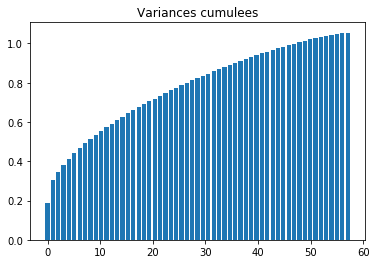

In [510]:
plt.figure()
plt.plot(mca_comp.L,marker='o')
plt.title('Valeurs propres')
plt.show()

plt.figure()
plt.bar(np.linspace(0,len(mca_comp.L),len(mca_comp.L)),np.cumsum(mca_comp.L))
plt.title('Variances cumulees')
plt.show()

> Observations: Inertie dispersée sur plusieurs axes, 80% nécessitent au moins une trentaine de composantes.

**Composantes de l'AFCM**

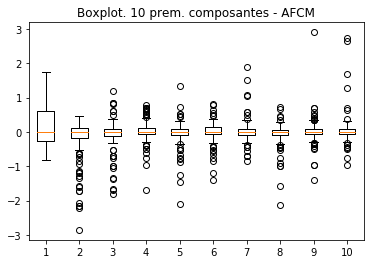

In [511]:
plt.figure()
plt.boxplot(mca_comp.fs_c()[:,0:10])
plt.title('Boxplot. 10 prem. composantes - AFCM')
plt.show()

> Observations: Beaucoup d'outliers, medianes autour de 0.

**Représentation des modalités**

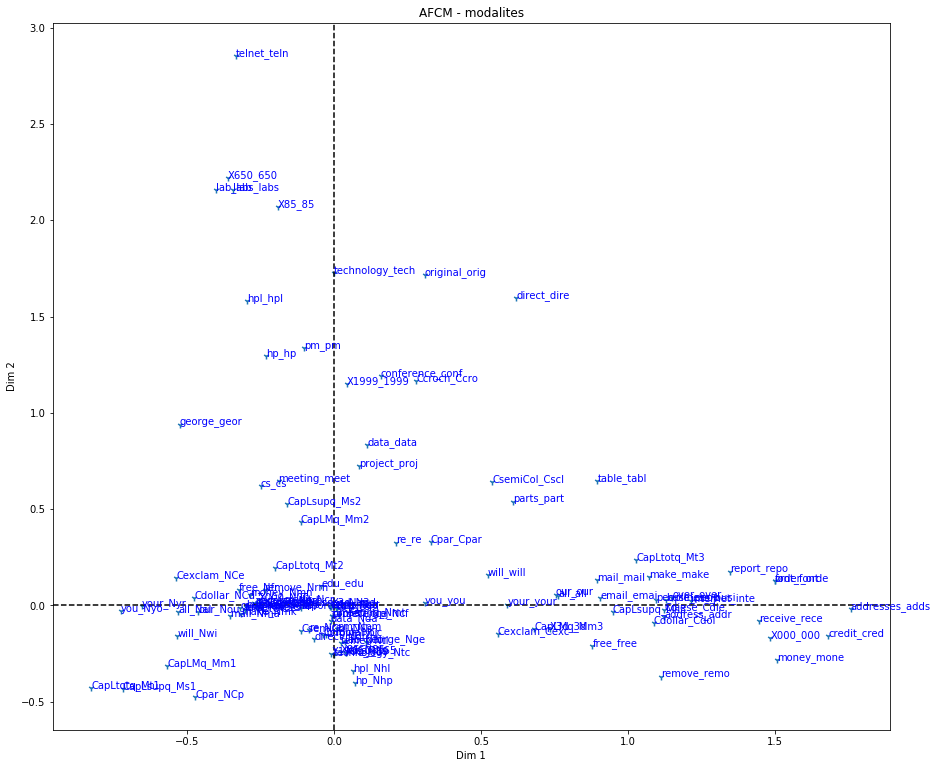

In [512]:
pca.explained_variance_ratio_#Affichage
fig = plt.figure(1, figsize=(15, 13))
plt.scatter(mca_comp.fs_c()[:, 0], -mca_comp.fs_c()[:, 1], marker='1')
for i, j, nom in zip(mca_comp.fs_c()[:, 0], -mca_comp.fs_c()[:, 1], D.columns):
     plt.text(i, j, nom,color='b')

plt.axhline(y=0,ls='--', color='black')
plt.axvline(x=0,ls='--', color='black')
        
plt.title('AFCM - modalites')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

> Observations: Caractérisation plus aisée des modalités (des variables) que dans l'ACP.

**Représentation des courriels**

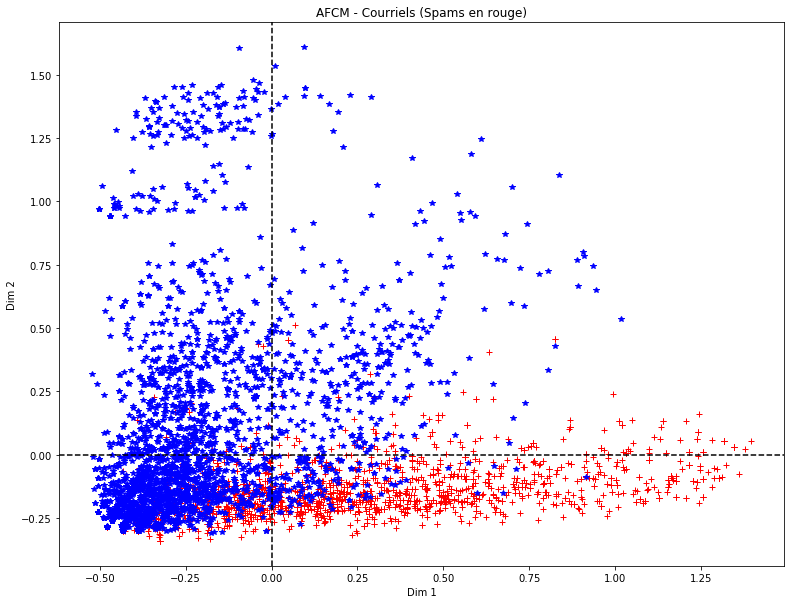

In [514]:
liste_var = spamq["spamf"]
fig = plt.figure(1, figsize=(13.,10.))
# graphe des individus
for i, j, type_spam in zip(mca_comp.fs_r()[:, 0],-mca_comp.fs_r()[:, 1], liste_var):
    if type_spam == "spam":
        plt.plot(i, j,marker = '+', c="r")
    else:
        plt.plot(i, j, marker = '*', c="b")

plt.axhline(y=0,ls='--', color='black')
plt.axvline(x=0,ls='--', color='black')

plt.title('AFCM - Courriels (Spams en rouge)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

> Observations: Distinction plus réussie des spams des autres courriels que dans l'ACP.

## VI. Classification des modalités

**CAH**

In [515]:
from scipy.cluster.hierarchy import *

In [516]:
#Distances entre modalités
D2 = euclidean_distances(mca_comp.fs_c()[:,0:5])

In [517]:
#Critères d'agglomération: ward, distance euclidienne
Z2 = linkage(D2,'ward' ,metric = 'euclidean')

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel/__main__.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app


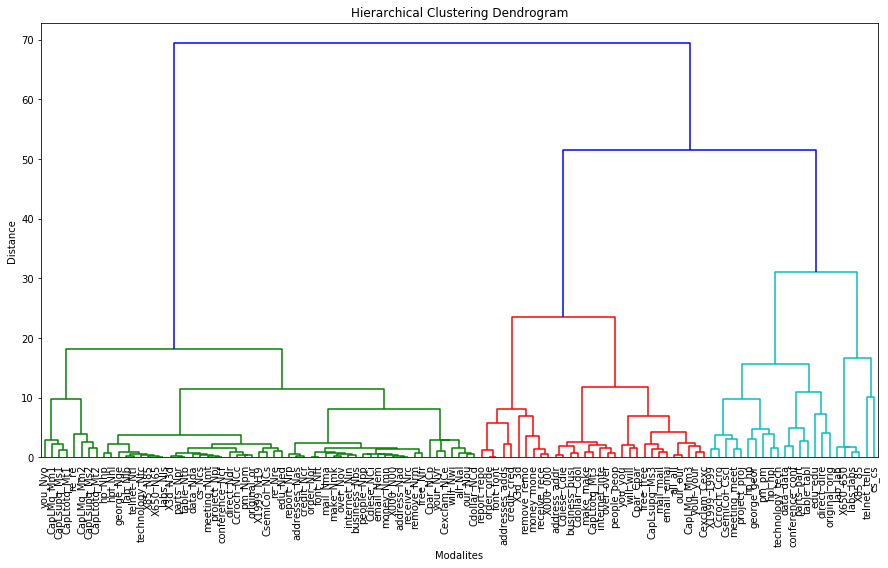

In [518]:
#Affichage
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Modalites')
plt.ylabel('Distance')

#Dendogram
clas2 = dendrogram(Z2,distance_sort =False,leaf_font_size=10.,labels=D.columns)
plt.show()

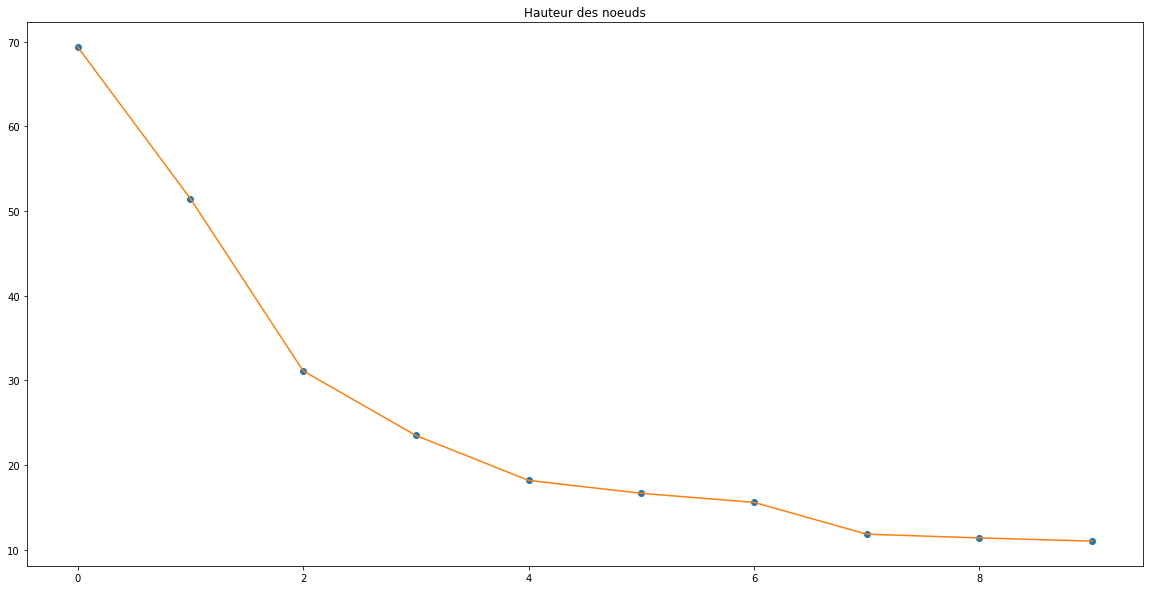

In [519]:
plt.figure(figsize=(20, 10))
plt.plot(maxdists(Z2)[::-1][0:10], 'o')
plt.plot(maxdists(Z2)[::-1][0:10])
plt.title('Hauteur des noeuds')
plt.show()

> Observations: Saut important d'inertie du noeud 3 au noeud 2: on retient alors 3 classes.

**Représentation des classes dans l'AFCM**

In [520]:
from scipy import cluster

In [521]:
cutree = cluster.hierarchy.cut_tree(Z2, n_clusters=4)

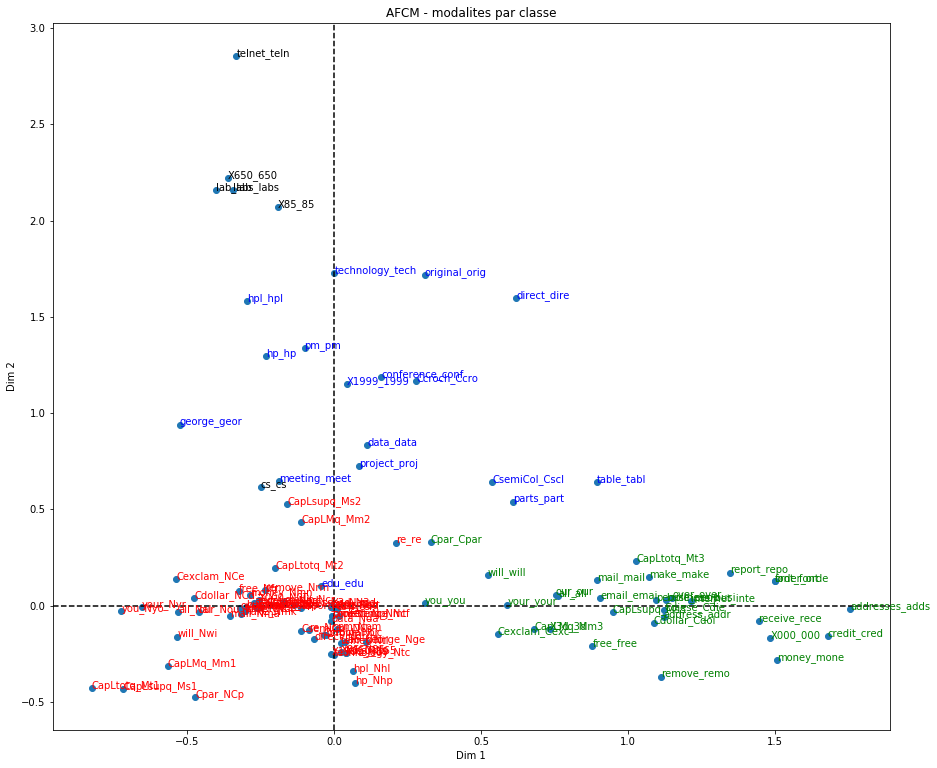

In [522]:
#Affichage
fig = plt.figure(1, figsize=(15, 13))
plt.scatter(mca_comp.fs_c()[:, 0], -mca_comp.fs_c()[:, 1])
indice = 0
for i, j, nom in zip(mca_comp.fs_c()[:, 0], -mca_comp.fs_c()[:, 1], D.columns):
    if cutree[indice] == 0:
        color = 'r'
    elif cutree[indice] == 1:
        color = 'g'
    elif cutree[indice] == 2:
        color = 'b'
    else:
        color = 'black'
    
    plt.text(i, j, nom, color=color)
    indice = indice + 1

plt.axhline(y=0,ls='--', color='black')
plt.axvline(x=0,ls='--', color='black')
        
plt.title('AFCM - modalites par classe')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

> Observations:

**K-means**

In [523]:
from sklearn.cluster import *
T=k_means(mca_comp.fs_c()[:,0:5],4)

In [524]:
np.sum(T[1])

121

In [525]:
intersection = np.zeros((4,4))
for i in np.arange(0,len(T[1])):
    for clas1 in np.arange(0,4):
        for clas2 in np.arange(0,4):
            if T[1][i] == clas2 and cutree[i,0] == clas1:
                intersection[clas1,clas2] = intersection[clas1,clas2] + 1

In [526]:
intersection

array([[ 59.,   0.,   0.,   0.],
       [  2.,   0.,   0.,  29.],
       [  0.,   7.,  10.,   0.],
       [  0.,   5.,   1.,   0.]])

In [527]:
np.shape(cutree)

(113, 1)

In [528]:
Kclass = []; Hclass = []
for i in np.arange(0,4):
    Kclass.append(list(T[1]).count(i))
    Hclass.append(list(cutree).count(i))

In [529]:
Hclass, Kclass

([59, 31, 17, 6], [61, 12, 11, 29])

## VII. Factorisation non négative - NMF

**Transformation**

In [531]:
#Transformation en une matrice
creux = pd.DataFrame.as_matrix(spam[liste_rapport + liste_nb_occurrence])
classe = spam['spam']

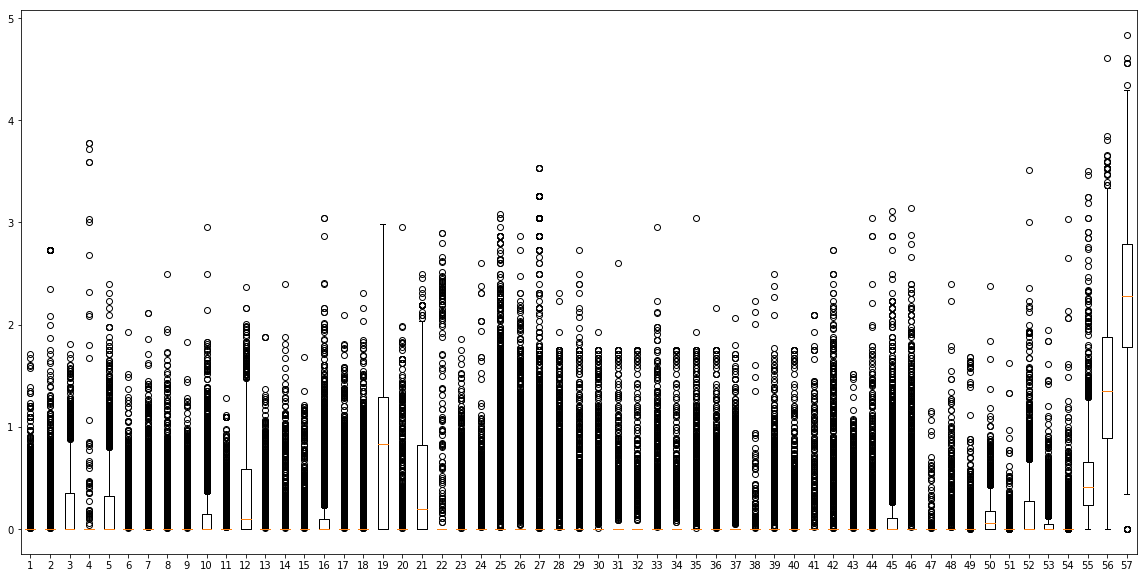

In [532]:
#Transformer les donnees par la fonction log
creux_log = np.concatenate(((np.log(1 + creux[:,0:54])),0.5*np.log(creux[:,54:57])), axis=1)
np.shape(creux_log)
np.shape(creux_log[[5,6],:])
plt.figure(figsize=(20, 10))
plt.boxplot(creux_log)
plt.show()

In [533]:
np.sum(np.sum(creux_log,axis=1)==0)
#supression des lignes à 0
ident = np.argwhere(np.sum(creux_log,axis=1)!=0)

In [534]:
creux_tilde=creux_log[ident[:,0],:]
classe_tilde = classe[ident[:,0]]

**Décomposition**

In [535]:
from sklearn.decomposition import NMF

In [ ]:
X = creux_tilde

In [ ]:
n_components = 5
model = NMF(n_components=n_components, init='random', random_state=0)

In [ ]:
#Lignes de W: coordonnées des lignes de X en fonction de celles de H
W = model.fit_transform(X)

#Lignes de H: nouvelles composantes (analogue de l'ACP mais sans contrainte d'ortho)
H = model.components_

**Visualisation des thèmes**

In [ ]:
#Variable "spam" non prise en compte
index = np.linspace(0,p-1,p-1)

In [ ]:
f, axarr = plt.subplots(n_components, sharex=True)
for i in np.arange(0,n_components):
    axarr[i].bar(index,H[i,:])
axarr[0].set_title('Composantes: resp. 1,2,3')
plt.show()

> Observations:

**Classe de variables**

In [ ]:
def classe(H):
    cl = []
    for i in np.arange(0,np.shape(H)[1]):
        cl.append(list(H[:,i]).index(max(H[:,i])))
    
    plt.plot(cl,'o')
    plt.title('Repartition des variables par classe')
    plt.xlabel('Variable')
    plt.show()
    return cl

In [ ]:
cl = classe(H)

In [ ]:
#Affichage
fig = plt.figure(1, figsize=(12, 10))
plt.scatter(coord1, coord2)
indice = 0
for i, j, nom in zip(coord1, coord2, liste):
    if cl[indice] == 0:
        color = 'r'
    elif cl[indice] == 1:
        color = 'g'
    elif cl[indice] == 2:
        color = 'b'
    else:
        color = 'black'
    
    plt.text(i, j, nom, color=color)
    indice = indice + 1

plt.axhline(y=0,ls='--', color='black')
plt.axvline(x=0,ls='--', color='black')
        
plt.title('ACP et NMF - modalites par classe')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

In [ ]:
def classe_(vj, W):
    classe_i = 0
    distance = np.linalg.norm(vj -W[:,0])
    
    for i in np.arange(1,np.shape(W)[1]):
        if np.linalg.norm(vj -W[:,i]) < distance:
            classe_i = i
            distance = np.linalg.norm(vj -W[:,i])
    return classe_i

def classe2(data, liste):
    cl = []
    for i in np.arange(0,len(liste)):
        cl.append(classe_(data[i],W))
    return cl

**Visualisation des individus**

In [ ]:
f, axarr = plt.subplots(3, sharex=True)
axarr[0].scatter(W[:,0],W[:,1])
axarr[0].set_title('Individus: resp. plan 12,13,23')
axarr[1].scatter(W[:,0],W[:,2])
axarr[2].scatter(W[:,1],W[:,2])
plt.show()

> Observations: Les vecteurs thèmes sont définis principalement par seulement deux ou trois variables d'étude (CapLM, CapLsup, CapLtot). Ces variables présentent de grandes valeurs par rapport aux autres qui sont des rapports.

On se propose alors de reduire les données.
Il nous faut toutefois faire attention, on ne peut ici centrer les données, car on pourrait perdre la propriété de posivité: hypothèse indispensable de la méthode NMF

Conclusion: Beaucoup de difficultés rencontrées pour mettre en oeuvre en python certaines approches comme NMF et MDS.